In [1]:
###############################
## Recovery Plots Gaussian ####
###############################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from numpy.random import rand, randn, choice, permutation
from scipy.linalg import hadamard

import torch
import torch.nn.functional as F

import tensorly as tl
from tensorly import decomposition
from tensorly.decomposition import parafac
from scipy import linalg

In [2]:
%run KZTIHT_Functions.ipynb
%run "Adaptive Row Removal Functions.ipynb"
%run Optimising_Trimming.ipynb
np.random.seed(9)

In [3]:
np.random.seed(9)
colors = ['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']

In [4]:
itr = 200
num_samples = 50
thresh = 0.0001

In [5]:
def generate_recovery_plots_fs(n_dim,r,compression_dim,num_high_search):
    
    cols = []
    data = []
    n = n_dim[0]*n_dim[1]*n_dim[2]
    k = 0
    
    for m in compression_dim:
    
        rec_IHT = 0
        rec_KZIHT = 0
        rec_ATIHT = 0
        rec_IHT_2 = 0
        cols = cols + ['kziht'+str(m), 'atiht'+str(m),'iht'+str(m) ]
        #print(m)
        
        median_data, num_high = plot_trim_HOSVD_fs(r,m,n_dim,num_high = num_high_search)

        for samples in range(num_samples):
            #print(samples)
        
            X = random_low_rank_HOSVD(n_dim,r)
            x = vectorize_np(X)
            A_1 = np.random.normal(0.0,1.0,(n_dim[0],m))
            A_2 = np.random.normal(0.0,1.0,(n_dim[1],m))
            A_3 = np.random.normal(0.0,1.0,(n_dim[2],m))
            A_4 = linalg.khatri_rao(A_1,linalg.khatri_rao(A_2,A_3))
            A = A_4.T
            b = A@x 
            y_KZIHT, error_KZIHT = KZIHT_HOSVD_RR(A,b,X,n,r,gamma = 1, itr = itr)
            y_ATIHT, error_ATIHT = adaptive_TIHT(A,b,X,r,lamda = 1/m,mu = 1,itr=itr, numb_high = num_high)
            y_IHT_2,error_IHT_2 = TIHT_HOSVD(A,b,X,r,lamda=1/m,itr = itr)

            if  error_KZIHT[itr-1] < thresh and error_KZIHT[itr-1] >= 0:
                rec_KZIHT = rec_KZIHT + 1 
            if error_ATIHT[itr-1] < thresh and error_ATIHT[itr-1] >= 0:
                rec_ATIHT = rec_ATIHT + 1 
            if error_IHT_2[itr-1] < thresh and error_IHT_2[itr-1] >= 0:
                rec_IHT_2 = rec_IHT_2 + 1 
        
        data = data + [rec_KZIHT,rec_ATIHT,rec_IHT_2]
        k = k+1
    
    data_1 = data
    data = np.array(data)[...,None]
    data = pd.DataFrame(data.T,columns = cols)
    data.to_csv('Recovery_Face_Split_'+str(r[0])+'_'+str(r[1])+'_'+str(r[2])+'dim'+str(n)+'.csv', header = True)

    return data_1

In [6]:
n_dim = [15,15,15]
compression_dim = [300,450,600,750,900,1050,1200,1350]
high = [10,20,40,60,80]


r = [2,2,2]
data_2 = generate_recovery_plots_fs(n_dim = n_dim,r=r,compression_dim = compression_dim,num_high_search = high)

/home/ss3472/.conda/envs/tensor-env/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ss3472/.conda/envs/tensor-env/lib/python3.13/site-packages/tensorly/decomposition/_tucker.py:204: RuntimeWarning: invalid value encountered in scalar divide
  rec_error = sqrt(abs(norm_tensor**2 - tl.norm(core, 2) ** 2)) / norm_tensor
/home/ss3472/.conda/envs/tensor-env/lib/python3.13/site-packages/tensorly/backend/core.py:736: RuntimeWarning: overflow encountered in square
  return self.sqrt(self.sum(self.abs(tensor) ** 2, axis=axis))
/home/ss3472/.conda/envs/tensor-env/lib/python3.13/site-packages/tensorly/decomposition/_tucker.py:204: RuntimeWarning: invalid value encountered in scalar subtract
  rec_error = sqrt(abs(norm_tensor**2 - tl.norm(core, 2) ** 2)) / norm_tensor
/home/ss3472/.conda/envs/tensor-env/lib/python3.13/site-packages/numpy/linalg/_linalg.py:2792: RuntimeWarning

Doesn't converge


/tmp/ipykernel_3258510/3553920879.py:14: RuntimeWarning: overflow encountered in matmul
  WW = np.array(vectorize_tl(vXX)) + lamda* np.matmul(AA.T, (yy - np.matmul(AA, np.array(vectorize_tl(vXX)))))


Doesn't converge
Doesn't converge
Doesn't converge


/tmp/ipykernel_3258510/3553920879.py:14: RuntimeWarning: invalid value encountered in matmul
  WW = np.array(vectorize_tl(vXX)) + lamda* np.matmul(AA.T, (yy - np.matmul(AA, np.array(vectorize_tl(vXX)))))


Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't conver

/home/ss3472/.conda/envs/tensor-env/lib/python3.13/site-packages/tensorly/backend/__init__.py:195: RuntimeWarning: invalid value encountered in dot
  return getattr(


Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge


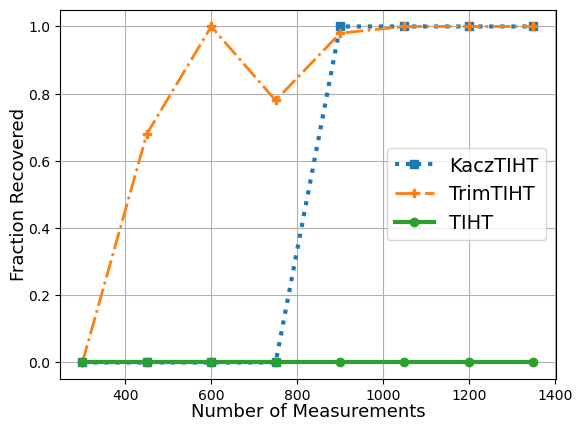

In [7]:
data_1 = pd.read_csv('Recovery_Face_Split_2_2_2dim3375.csv')
data_1 = np.array(data_1.drop(data_1.columns[0],axis = 1))[0]
plt.figure()
plt.title("", pad = 30, loc = "center")
compression_dim = [300,450,600,750,900,1050,1200,1350]
plt.plot(compression_dim, data_1[0::3]/50, label = "KaczTIHT",linestyle = "dotted",linewidth=3, marker = "s")
plt.plot(compression_dim, data_1[1::3]/50, label = "TrimTIHT",linestyle = "dashdot",linewidth=2, marker = "P")
plt.plot(compression_dim, data_1[2::3]/50, label = "TIHT",linewidth=3,marker = "o")

subtitle_string = "Gaussian Measurements"

plt.legend(fontsize = '14', loc = "center right")
plt.xlabel(xlabel="Number of Measurements",labelpad = 0,fontsize = 13)
plt.ylabel(ylabel="Fraction Recovered",labelpad = 0,fontsize = 13)
plt.grid()
plt.savefig('Recovery_Face_Split_3375_2_2_2.png', dpi=300,  bbox_inches="tight")

In [ ]:
n_dim = [15,15,15]
compression_dim = [450,600,750,900,1050,1200,1350,1500]
high = [10,20,30,40,60,80]


r = [4,4,4]
data_4 = generate_recovery_plots_fs(n_dim = n_dim,r=r,compression_dim = compression_dim,num_high_search = high)

/home/ss3472/.conda/envs/tensor-env/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ss3472/.conda/envs/tensor-env/lib/python3.13/site-packages/tensorly/decomposition/_tucker.py:204: RuntimeWarning: invalid value encountered in scalar divide
  rec_error = sqrt(abs(norm_tensor**2 - tl.norm(core, 2) ** 2)) / norm_tensor
/home/ss3472/.conda/envs/tensor-env/lib/python3.13/site-packages/tensorly/backend/core.py:736: RuntimeWarning: overflow encountered in square
  return self.sqrt(self.sum(self.abs(tensor) ** 2, axis=axis))
/home/ss3472/.conda/envs/tensor-env/lib/python3.13/site-packages/tensorly/decomposition/_tucker.py:204: RuntimeWarning: invalid value encountered in scalar subtract
  rec_error = sqrt(abs(norm_tensor**2 - tl.norm(core, 2) ** 2)) / norm_tensor
/home/ss3472/.conda/envs/tensor-env/lib/python3.13/site-packages/numpy/linalg/_linalg.py:2792: RuntimeWarning

Doesn't converge
Doesn't converge
Doesn't converge


/tmp/ipykernel_3258510/3553920879.py:14: RuntimeWarning: invalid value encountered in matmul
  WW = np.array(vectorize_tl(vXX)) + lamda* np.matmul(AA.T, (yy - np.matmul(AA, np.array(vectorize_tl(vXX)))))


Doesn't converge


/home/ss3472/.conda/envs/tensor-env/lib/python3.13/site-packages/tensorly/backend/__init__.py:195: RuntimeWarning: invalid value encountered in dot
  return getattr(


Doesn't converge
Doesn't converge
Doesn't converge


In [ ]:
data_1 = pd.read_csv('Recovery_Face_Split_4_4_4dim3375.csv')
data_1 = np.array(data_1.drop(data_1.columns[0],axis = 1))[0]
plt.figure()
plt.title("", pad = 30, loc = "center")
compression_dim = [300,450,600,750,900,1050,1200,1350]
plt.plot(compression_dim, data_1[0::3]/50, label = "KaczTIHT",linestyle = "dotted",linewidth=3, marker = "s")
plt.plot(compression_dim, data_1[1::3]/50, label = "TrimTIHT",linestyle = "dashdot",linewidth=2, marker = "P")
plt.plot(compression_dim, data_1[2::3]/50, label = "TIHT",linewidth=3,marker = "o")

subtitle_string = "Gaussian Measurements"

plt.legend(fontsize = '14', loc = "center right")
plt.xlabel(xlabel="Number of Measurements",labelpad = 0,fontsize = 13)
plt.ylabel(ylabel="Fraction Recovered",labelpad = 0,fontsize = 13)
plt.grid()
plt.savefig('Recovery_Face_Split_3375_4_4_4.png', dpi=300,  bbox_inches="tight")

In [ ]:
##################################
#### CP Rank #####################

def generate_recovery_plots_CP_fs(n_dim,r,compression_dim,num_high_search):
    
    cols = []
    data = []
    n = n_dim[0]*n_dim[1]*n_dim[2]
    k = 0
    
    for m in compression_dim:
    
        rec_IHT = 0
        rec_KZIHT = 0
        rec_ATIHT = 0
        rec_IHT_2 = 0
        cols = cols + ['kziht'+str(m), 'atiht'+str(m),'iht'+str(m) ]
        #print(m)
        
        median_data, num_high = plot_trim_CP_fs(r,m,n_dim,num_high = num_high_search)
        for samples in range(num_samples):
            #print(samples)
        
            X = random_low_rank_CP(n_dim,r)
            x = vectorize_np(X)
            A_1 = np.random.normal(0.0,1.0,(n_dim[0],m))
            A_2 = np.random.normal(0.0,1.0,(n_dim[1],m))
            A_3 = np.random.normal(0.0,1.0,(n_dim[2],m))
            A_4 = linalg.khatri_rao(A_1,linalg.khatri_rao(A_2,A_3))
            A = A_4.T
            b = A@x 

            y_KZIHT, error_KZIHT = KZIHT_CP_RR(A,b,X,n,r,gamma = 1, itr = itr)
            y_ATIHT, error_ATIHT = adaptive_TIHT_CP(A,b,X,r,lamda = 1/m,mu = 1,itr=itr, numb_high = num_high)
            y_IHT_2,error_IHT_2 = TIHT_CP(A,b,X,r,lamda=1/m,itr = itr)

            if  error_KZIHT[itr-1] < thresh and error_KZIHT[itr-1] >= 0:
                rec_KZIHT = rec_KZIHT + 1 
            if error_ATIHT[itr-1] < thresh and error_ATIHT[itr-1] >= 0:
                rec_ATIHT = rec_ATIHT + 1 
            if error_IHT_2[itr-1] < thresh and error_IHT_2[itr-1] >= 0:
                rec_IHT_2 = rec_IHT_2 + 1 
        
        data = data + [rec_KZIHT,rec_ATIHT,rec_IHT_2]
        k = k+1
    
    data_1 = data
    data = np.array(data)[...,None]
    data = pd.DataFrame(data.T,columns = cols)
    data.to_csv('Recovery_Face_Split_CP'+str(r)+'_'+'dim'+str(n)+'.csv', header = True)

    return data_1

In [ ]:
np.random.seed(9)
n_dim = [15,15,15]
compression_dim = [600,750,900,1050,1200,1350,1500,1650]
high = [10,20,40,60,80]

r = 3
data_2 = generate_recovery_plots_CP_fs(n_dim = n_dim,r=r,compression_dim = compression_dim,num_high_search = high)

In [ ]:
data_1 = pd.read_csv('Recovery_Face_Split_CP3_dim3375.csv')
data_1 = np.array(data_1.drop(data_1.columns[0],axis = 1))[0]
plt.figure()
plt.title("", pad = 30, loc = "center")
compression_dim = [600,750,900,1050,1200,1350,1500,1650]
plt.plot(compression_dim, data_1[0::3]/50, label = "KaczTIHT",linestyle = "dotted",linewidth=3, marker = "s")
plt.plot(compression_dim, data_1[1::3]/50, label = "TrimTIHT",linestyle = "dashdot",linewidth=2, marker = "P")
plt.plot(compression_dim, data_1[2::3]/50, label = "TIHT",linewidth=3,marker = "o")

subtitle_string = "Gaussian Measurements"

plt.legend(fontsize = '14', loc = "center right")
plt.xlabel(xlabel="Number of Measurements",labelpad = 0,fontsize = 13)
plt.ylabel(ylabel="Fraction Recovered",labelpad = 0,fontsize = 13)
plt.grid()
plt.savefig('Recovery_Face_Split_CP_3375_3.png', dpi=300,  bbox_inches="tight")